<a href="https://colab.research.google.com/github/boshuaiYu/Deeplearning_pytorch/blob/main/%E5%94%90%E5%AE%87%E8%BF%AApytorch1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import pandas as pd
%matplotlib inline
print(torch.__version__)

1.12.1+cu113


view可以改变矩阵维度

view和reshape区别参考：https://blog.csdn.net/Flag_ing/article/details/109129752

1.1 线性回归demo

In [19]:
# 获取（创建）数据
def synthetic_data(w, b, num_examples):
  X = torch.normal(0, 1, (num_examples, len(w)))
  y = torch.mv(X, w) + b
  y += torch.normal(0,1,y.shape)
  return X, y.reshape((-1,1))

true_w = torch.tensor([2, -3.4])
true_b = 4.2
features, labels = synthetic_data(true_w, true_b, 1000)
features.shape, labels.shape


(torch.Size([1000, 2]), torch.Size([1000, 1]))

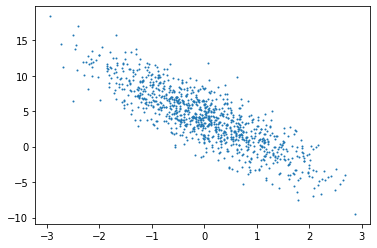

In [22]:
plt.scatter(features[:, 1].detach().numpy(), labels.detach().numpy(), 1)

In [38]:
import torch.nn as nn
import torch.optim as op
# 建模型

model = nn.Sequential(
    nn.Linear(2,1)
)

# 定义参数和损失函数
epochs = 1000
learning_rate = 0.01
optimizer = op.SGD(model.parameters(), lr=learning_rate)
loss = nn.MSELoss()

# 模型训练

for epoch in range(epochs):
  epochs += 1
  L = loss(model(features), labels)
  optimizer.zero_grad()
  L.backward()
  optimizer.step()
  if epoch % 50 ==0:
    print('epoch {}, Loss {}'.format(epoch, L))

torch.save(model.state_dict(), 'model.pkl')


epoch 0, Loss 31.493627548217773
epoch 50, Loss 4.834190845489502
epoch 100, Loss 1.4742454290390015
epoch 150, Loss 1.0480912923812866
epoch 200, Loss 0.9937321543693542
epoch 250, Loss 0.9867633581161499
epoch 300, Loss 0.9858658909797668
epoch 350, Loss 0.9857499003410339
epoch 400, Loss 0.9857348203659058
epoch 450, Loss 0.985732913017273
epoch 500, Loss 0.9857326745986938
epoch 550, Loss 0.9857326149940491
epoch 600, Loss 0.9857326745986938
epoch 650, Loss 0.9857325553894043
epoch 700, Loss 0.9857325553894043
epoch 750, Loss 0.9857325553894043
epoch 800, Loss 0.9857325553894043
epoch 850, Loss 0.9857325553894043
epoch 900, Loss 0.9857325553894043
epoch 950, Loss 0.9857325553894043


In [34]:
model.load_state_dict(torch.load('model.pkl'))

<All keys matched successfully>

hub模块（调用别人建好的模型）

https://pytorch.org/hub/


AttributeError: ignored

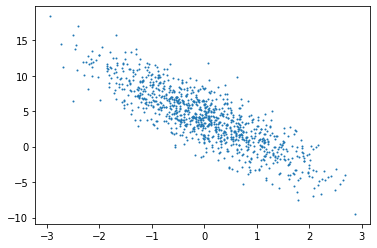